In [ ]:
#Drive'a erişim sağlıyoruz
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/derin_ogrenme/deeplearning

Mounted at /content/drive/
/content/drive/My Drive/derin_ogrenme/deeplearning


In [ ]:
#Kütüphaneleri import ediyoruz

from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
#Benzerlik matrisini çağırıyoruz
similarity= pd.read_csv("Result_Simularity.csv")
similarity

,image_new/1636.jpg,image_new/1637.jpg,image_new/1653.jpg,image_new/1654.jpg,image_new/1806.jpg,image_new/1831.jpg,image_new/1836.jpg,image_new/2211.jpg,image_new/2218.jpg,image_new/2219.jpg,image_new/2220.jpg,image_new/2227.jpg,image_new/2399.jpg,image_new/2477.jpg,image_new/2504.jpg,image_new/2610.jpg,image_new/2611.jpg,image_new/2616.jpg,image_new/2618.jpg,image_new/2626.jpg,image_new/2627.jpg,image_new/2628.jpg,image_new/2629.jpg,image_new/2642.jpg,image_new/2691.jpg,image_new/2693.jpg,image_new/2694.jpg,image_new/2695.jpg,image_new/2697.jpg,image_new/2699.jpg,image_new/2700.jpg,image_new/2701.jpg,image_new/2702.jpg,image_new/2703.jpg,image_new/2704.jpg,image_new/2705.jpg,image_new/2706.jpg,image_new/2707.jpg,image_new/2708.jpg,image_new/2710.jpg,...,image_new/57506.jpg,image_new/57507.jpg,image_new/57508.jpg,image_new/57509.jpg,image_new/57530.jpg,image_new/57531.jpg,image_new/57849.jpg,image_new/57853.jpg,image_new/57854.jpg,image_new/57934.jpg,image_new/57935.jpg,image_new/57950.jpg,image_new/57980.jpg,image_new/58231.jpg,image_new/58326.jpg,image_new/58327.jpg,image_new/58328.jpg,image_new/58329.jpg,image_new/58458.jpg,image_new/58459.jpg,image_new/58460.jpg,image_new/58488.jpg,image_new/58815.jpg,image_new/59032.jpg,image_new/59033.jpg,image_new/59034.jpg,image_new/59035.jpg,image_new/59050.jpg,image_new/59051.jpg,image_new/59056.jpg,image_new/59146.jpg,image_new/59147.jpg,image_new/59326.jpg,image_new/59387.jpg,image_new/59388.jpg,image_new/59435.jpg,image_new/59757.jpg,image_new/59759.jpg,image_new/59761.jpg,image_new/59943.jpg
0,1.000000,0.494038,0.725345,0.593346,0.329263,0.685810,0.608139,0.692710,0.402735,0.538123,0.364498,0.458824,0.617311,0.704793,0.573376,0.490617,0.324884,0.436549,0.362883,0.315027,0.362926,0.613091,0.382986,0.565837,0.272106,0.297630,0.286066,0.252709,0.219038,0.494105,0.250191,0.234540,0.265572,0.287336,0.505516,0.204234,0.224650,0.545828,0.305480,0.283462,...,0.441912,0.337917,0.511671,0.367698,0.400604,0.402300,0.313675,0.318706,0.375738,0.372909,0.319816,0.378962,0.290791,0.450069,0.343794,0.510016,0.345185,0.341898,0.451654,0.246746,0.235408,0.324892,0.331827,0.426850,0.544087,0.311491,0.341590,0.557819,0.340659,0.578289,0.310097,0.476770,0.486943,0.344896,0.540683,0.420651,0.640761,0.588556,0.278012,0.379747
1,0.494038,1.000000,0.422512,0.452682,0.586476,0.473078,0.455401,0.345141,0.321245,0.433829,0.520919,0.344287,0.349505,0.389898,0.372541,0.312275,0.523506,0.605824,0.674334,0.574837,0.620674,0.290580,0.639918,0.317303,0.520033,0.586885,0.390729,0.468535,0.526469,0.175423,0.505070,0.540548,0.501684,0.545608,0.269099,0.273016,0.313548,0.194781,0.524168,0.589558,...,0.362766,0.693945,0.323701,0.578480,0.657877,0.559979,0.618195,0.707060,0.506353,0.560002,0.551650,0.677108,0.469517,0.215721,0.557088,0.230421,0.620444,0.616346,0.220639,0.620979,0.594613,0.536544,0.521963,0.529659,0.277489,0.481621,0.586785,0.390458,0.575099,0.293176,0.458064,0.317898,0.305993,0.520454,0.358424,0.553494,0.293477,0.331645,0.530441,0.556366
2,0.725345,0.422512,1.000000,0.538877,0.300951,0.673976,0.558895,0.705877,0.381231,0.448077,0.382252,0.535233,0.588316,0.737324,0.599766,0.448129,0.314671,0.385177,0.272884,0.302881,0.307910,0.664579,0.332369,0.630741,0.207448,0.205517,0.223289,0.216689,0.180690,0.556468,0.188903,0.184755,0.225088,0.223690,0.503843,0.180760,0.193812,0.548736,0.192902,0.175697,...,0.411103,0.286298,0.513533,0.414541,0.386829,0.391349,0.304014,0.282660,0.383394,0.371502,0.346100,0.359316,0.240686,0.525862,0.269357,0.508104,0.339617,0.289427,0.413400,0.188084,0.189661,0.328720,0.312969,0.416933,0.602242,0.286999,0.294263,0.498191,0.279837,0.543413,0.287064,0.417163,0.467488,0.331094,0.471703,0.431128,0.578445,0.608724,0.283535,0.351602
3,0.593346,0.452682,0.538877,1.000000,0.319935,0.608381,0.575920,0.482479,0.638632,0.599970,0.391170,0.557082,0.460139,0.576810,0.667687,0.364315,0.323682,0.365595,0.316946,0.349836,0.333957,0.492001,0.326636,0.538612,0.226301,0.273985,0.257441,0.251343,0.2

In [ ]:
#Sıralı olup olmadığını kontrol ediyoruz ve fotoğrafları yüklemek için files listesine ekleme yapıyoruz
liste = similarity.columns
files = liste.to_list()
files

['image_new/1636.jpg',
 'image_new/1637.jpg',
 'image_new/1653.jpg',
 'image_new/1654.jpg',
 'image_new/1806.jpg',
 'image_new/1831.jpg',
 'image_new/1836.jpg',
 'image_new/2211.jpg',
 'image_new/2218.jpg',
 'image_new/2219.jpg',
 'image_new/2220.jpg',
 'image_new/2227.jpg',
 'image_new/2399.jpg',
 'image_new/2477.jpg',
 'image_new/2504.jpg',
 'image_new/2610.jpg',
 'image_new/2611.jpg',
 'image_new/2616.jpg',
 'image_new/2618.jpg',
 'image_new/2626.jpg',
 'image_new/2627.jpg',
 'image_new/2628.jpg',
 'image_new/2629.jpg',
 'image_new/2642.jpg',
 'image_new/2691.jpg',
 'image_new/2693.jpg',
 'image_new/2694.jpg',
 'image_new/2695.jpg',
 'image_new/2697.jpg',
 'image_new/2699.jpg',
 'image_new/2700.jpg',
 'image_new/2701.jpg',
 'image_new/2702.jpg',
 'image_new/2703.jpg',
 'image_new/2704.jpg',
 'image_new/2705.jpg',
 'image_new/2706.jpg',
 'image_new/2707.jpg',
 'image_new/2708.jpg',
 'image_new/2710.jpg',
 'image_new/2711.jpg',
 'image_new/2712.jpg',
 'image_new/2714.jpg',
 'image_new

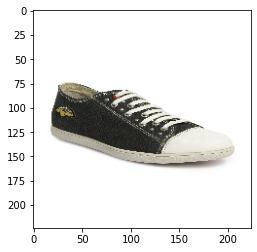

image loaded successfully!


In [ ]:
#bir tane fotoğraf gösteriyoruz
original = load_img(files[699], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Fotoğraf başarıyla yüklendi!")

In [ ]:
numpy_image = img_to_array(original)

# (batchsize, height, width, channels)
#fotografa ek bir boyuyt ekliyoruz axis 0 icin.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# sonra modeli VGG modeli veya Resnet modeli icin hazirliyoruz fotograflarimizi
processed_image = preprocess_input(image_batch.copy())
print(len(files))

image batch size (1, 224, 224, 3)
2549


In [ ]:
#Fotoğraf için girdi boyutu ve gösterilecek benzer ürün sayısı belirleniyor
imgs_model_width, imgs_model_height = 224,224

nb_closest_images = 5

In [ ]:
# Daha sonra modeli beslemek icin tum fotograflarimi yukluyoruz.

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

'image_new/2724.jpg'

In [ ]:
#benzer ürünleri ve benzerlik puanlarını gösteriyoruz
similarity[files[50]].sort_values(ascending=False)[1:nb_closest_images+1]

434     0.894454
1533    0.882655
1530    0.861268
1336    0.859930
2301    0.843127
Name: image_new/2724.jpg, dtype: float64

In [ ]:
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
#input için bir adet fotoğraf seçiyoruz
input = files[1222]

NameError: ignored

-----------------------------------------------------------------------
original product:


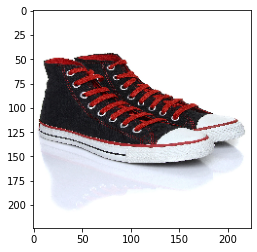

image_new/3797.jpg


In [ ]:
 #Seçilen ürün gösteriliyor
  print("-----------------------------------------------------------------------")
  print("Seçilen Ürün:")
  original = load_img(input, target_size=(imgs_model_width, imgs_model_height))
  plt.imshow(original)
  plt.show()
  print(input)
  
  closest_imgs = similarity[input].sort_values(ascending=False)[1:nb_closest_images+1].index
  closest_imgs_scores = similarity[input].sort_values(ascending=False)[1:nb_closest_images+1]

In [ ]:
print(closest_imgs_scores.values)

[0.89826465 0.89152973 0.86687764 0.85750231 0.85365296]


-----------------------------------------------------------------------
Most Similar Products : 0


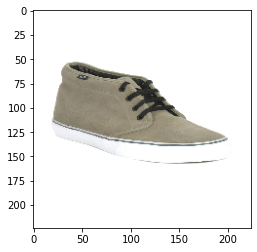

0.8982646543822281
image_new/3797.jpg
-----------------------------------------------------------------------
Most Similar Products : 1


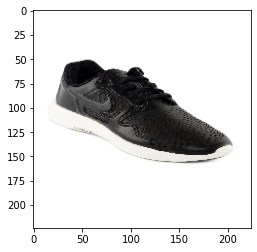

0.8915297289999999
image_new/3797.jpg
-----------------------------------------------------------------------
Most Similar Products : 2


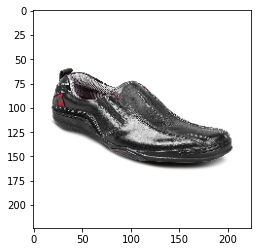

0.8668776399999998
image_new/3797.jpg
-----------------------------------------------------------------------
Most Similar Products : 3


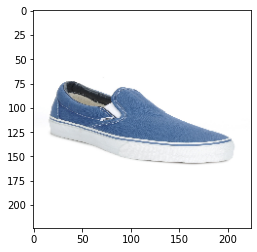

0.8575023114685887
image_new/3797.jpg
-----------------------------------------------------------------------
Most Similar Products : 4


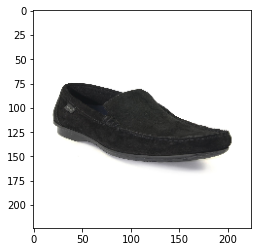

0.85365296
image_new/3797.jpg


In [ ]:
#En benzer ürünler sırayla listeleniyor
for x in range(len(closest_imgs)):
  print("-----------------------------------------------------------------------")
  print("Most Similar Products :",x)
  original = load_img(files[closest_imgs[x]], target_size=(imgs_model_width, imgs_model_height))
  plt.imshow(original)
  plt.show()
  print(closest_imgs_scores.values[x])
  print(input)